# Introduction to Regression with Neural Networks with TF

* Predict a numerical variable based on some other combination of variables i.e predict a numerical value

Resources: http://introtodeeplearning.com/

## Steps in modelling with TF

1. **Creating a model**: define the input and output layers, as well as the hidden layers of a deep learning model

2. **Compiling a model**: define the
    * loss function (in other words, the function which tells our model how wrong it is) and
    * the optimizer (tells our model how to improve the patterns it is learning) and
    * evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting a model**: letting the model try to find the patterns


## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model**: might add more layers, increae the number of hidden units (i.e. neurons) within each of the hidden layers, change the activation function of each layer

2. **Compiling a model**: might change the optimization function or  **learning rate** of the optimization function

3. **Fitting a model**: might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from)


### Common ways of improving a deep model:
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate

In [ ]:
# Import TF
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

print(tf.__version__)

2.15.0


# Create data to view and fit

In [ ]:
# Create features
X = np.array([-7.0, -4.0,-1.0, 2.0, 5.0, 8.0, 11.0, 14.0 ])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Input and Output Shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X[0].shape
output_shape = Y[0].shape

input_shape, output_shape

((), ())

In [ ]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
Y = tf.constant(Y)

X,Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = Y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

# Modelling in TF

In [ ]:
# set random seed
tf.random.set_seed(40)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
              metrics = ["mae"])

# NOTE: A metric is a function that is used to judge the performance of your model.
# Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model. Note that you may use any loss function as a metric.

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 18.1362 - mae: 18.1362
Epoch 2/5
1/1 [==============================] - 0s 37ms/step - loss: 17.8550 - mae: 17.8550
Epoch 3/5
1/1 [==============================] - 0s 25ms/step - loss: 17.5737 - mae: 17.5737
Epoch 4/5
1/1 [==============================] - 0s 21ms/step - loss: 17.2925 - mae: 17.2925
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 17.0112 - mae: 17.0112


# Improving the model

In [ ]:
# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss = tf.keras.losses.mae, # mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent
              metrics = ["mae"])

# 3. Fit the model (train for longer)

model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 15.7349 - mae: 15.7349
Epoch 2/100
1/1 [==============================] - 0s 30ms/step - loss: 15.4536 - mae: 15.4536
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 15.1724 - mae: 15.1724
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 14.9162 - mae: 14.9162
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 14.7837 - mae: 14.7837
Epoch 6/100
1/1 [==============================] - 0s 25ms/step - loss: 14.6512 - mae: 14.6512
Epoch 7/100
1/1 [==============================] - 0s 30ms/step - loss: 14.5187 - mae: 14.5187
Epoch 8/100
1/1 [==============================] - 0s 28ms/step - loss: 14.3862 - mae: 14.3862
Epoch 9/100
1/1 [==============================] - 0s 32ms/step - loss: 14.2537 - mae: 14.2537
Epoch 10/100
1/1 [==============================] - 0s 29ms/step - loss: 14.1212 - mae: 14.1212
Epoch 11/100
1/1 [==============================] -

In [ ]:
# Model prediction

model.predict([17.0])

1/1 [==============================] - 0s 308ms/step


array([[29.61213]], dtype=float32)

In [ ]:
# Make another to improve our model

# 1. Create the model (extra hidden layer with 100 hidden units)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit
model.fit(tf.expand_dims(X, axis = -1), Y, epochs = 100)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.2949 - mae: 12.2949
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 11.6766 - mae: 11.6766
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 11.0447 - mae: 11.0447
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 10.3953 - mae: 10.3953
Epoch 5/100
1/1 [==============================] - 0s 31ms/step - loss: 9.7234 - mae: 9.7234
Epoch 6/100
1/1 [==============================] - 0s 25ms/step - loss: 9.0271 - mae: 9.0271
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 8.2919 - mae: 8.2919
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 7.5123 - mae: 7.5123
Epoch 9/100
1/1 [==============================] - 0s 29ms/step - loss: 6.6827 - mae: 6.6827
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: 5.8059 - mae: 5.8059
Epoch 11/100
1/1 [==============================] - 0s 34ms/ste

In [ ]:
# Another improvement

# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), Y, epochs = 100 )

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 14.4623 - mae: 14.4623
Epoch 2/100
1/1 [==============================] - 0s 30ms/step - loss: 13.7594 - mae: 13.7594
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 13.0614 - mae: 13.0614
Epoch 4/100
1/1 [==============================] - 0s 27ms/step - loss: 12.3667 - mae: 12.3667
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 11.6738 - mae: 11.6738
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 10.9804 - mae: 10.9804
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 10.2835 - mae: 10.2835
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 9.5798 - mae: 9.5798
Epoch 9/100
1/1 [==============================] - 0s 45ms/step - loss: 8.8662 - mae: 8.8662
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 8.1401 - mae: 8.1401
Epoch 11/100
1/1 [==============================] - 0s 49

In [ ]:
# Prediction

model.predict([17.0])

1/1 [==============================] - 0s 162ms/step


array([[27.248915]], dtype=float32)

# Evaluating a model

In practice, a typical workflow is as follows:
 Build model -> fit it -> evaluate it -> teak it -> repeat


In [ ]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset

Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

### The 3 sets...
* **Training Set** : the model learns from this data (typically 70-80% of the total data)

* **Validation** : the model gets tuned on this data (typically 10-15% of the total data)

* **Test** : the model gets evaluated on this data to test what it has learned (10-15% of the total data)

In [ ]:
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40
Y_train = Y[:40]

X_test = X[40:] # last 10
Y_test = Y[40:]

len(X_train), len(X_test)

(40, 10)

In [ ]:
# Build NN for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])


# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100, verbose = 0)


### model.summary()

* **Total params** : total number of parameters in the model
* **Trainable parameters** : these are the parameters (patterns) the model can update as it trains
* **Non-trainable params** : these parameters are NOT updated during training (this is typical when you have parameters from other  models during **transfer learning**)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


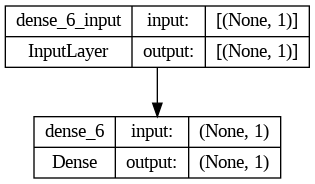

In [ ]:
# Visualizes the model

from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True)

## Visualizing our model's predictions
To visualize predictions, it is a good idea to plot them against the ground truth labels.

Often you will see this in for the form $y_test$ or $y_true$ versus $y_pred$ (ground truth versus your model)

In [ ]:
# Make some predictions

y_pred = model.predict(X_test)
y_pred # same tensor format as y_test

1/1 [==============================] - 0s 49ms/step


array([[62.32233 ],
       [66.37906 ],
       [70.43579 ],
       [74.492516],
       [78.54925 ],
       [82.60597 ],
       [86.662704],
       [90.71944 ],
       [94.77616 ],
       [98.83289 ]], dtype=float32)

In [ ]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Let's create a plotting function

def plot_predictions(train_data = X_train,
                    train_labels = Y_train,
                    test_data = X_test,
                    test_labels = Y_test,
                    predictions = y_pred):
  """
Plots training data, test data, and compares predictions to ground truth
  """

  plt.figure(figsize = (10, 7))

  # Plot training in blue

  plt.scatter(train_data, train_labels, c = "b", label = "Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c = "g", label = "Testing data")
  # Plot model's predicitons in red
  plt.scatter(test_data, predictions, c = "r", label = "Predictions")
  # Show legend
  plt.legend();

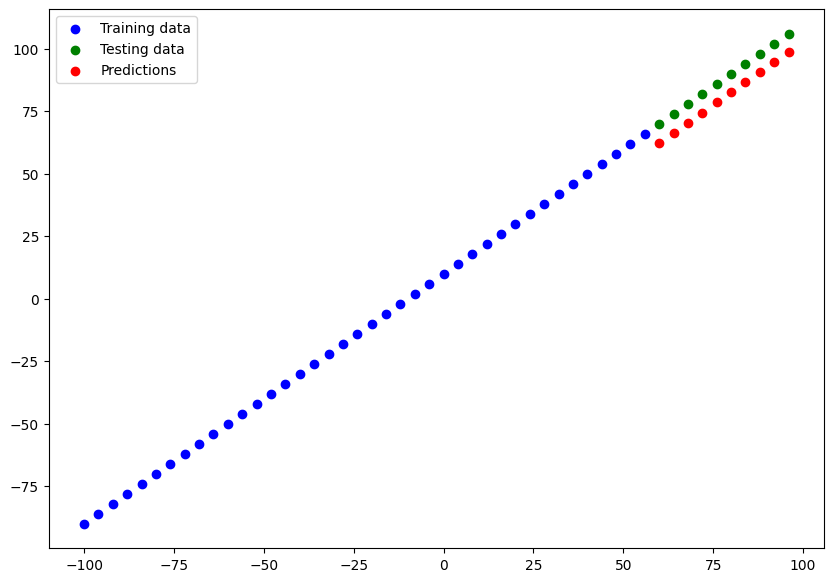

In [ ]:
plot_predictions(train_data = X_train,
                 train_labels = Y_train,
                 test_data = X_test,
                 test_labels = Y_test,
                 predictions = y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you are working on, there will be different evaluation metrics for performance.

Since we are working on regression, two of the main metrics:
* **MAE** (Mean Absolute Error): "on average, how wrong is each of my model's predictions"

* **MSE** (Mean Square Error): "square the average errors"

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 142ms/step - loss: 7.4224 - mae: 7.4224


[7.422389030456543, 7.422389030456543]

In [ ]:
# Calculate the MAE
mae = tf.metrics.mean_absolute_error(y_true = Y_test,
                                     y_pred = tf.squeeze(y_pred))  # Have to use tf.squeeze to remove the 1 dims from the tensor
mae

<tf.Tensor: shape=(), dtype=float32, numpy=7.422389>

In [ ]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true = Y_test,
                                    y_pred = tf.squeeze(y_pred))

mse

<tf.Tensor: shape=(), dtype=float32, numpy=55.11841>

In [ ]:
# Make functions to reuse MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true,
                                        y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true,
                                       y_pred = tf.squeeze(y_pred))

### Running experiments to improve our model
'''
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it .....
'''

[1]. **Get more data**: get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).

[2]. **Make your model larger**: using a more complex model by adding more layers or more hidden units in each layer.

[3]. **Train for longer**: give your model more of a chance to find patterns in the data.


We will do 3 modeling experiments:
1. 'Model 1': Same as the original model, 1 layer, trained for 100 epochs.
2. 'Model 2': 2 layers, trained for 100 epochs.
3. 'Model 3': 2 layers, trained for 500 epochs.

## Build Model 1

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"]
                )

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis = -1), Y_train, epochs = 100)


Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 29.0590 - mae: 29.0590
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1954 - mae: 9.1954
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 7.9605 - mae: 7.9605
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 7.9433 - mae: 7.9433
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.2154 - mae: 10.2154
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4712 - mae: 9.4712
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.6036 - mae: 8.6036
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0401 - mae: 9.0401
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.8483 - mae: 18.8483
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1628 - mae: 10.1628
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - loss

1/1 [==============================] - 0s 49ms/step


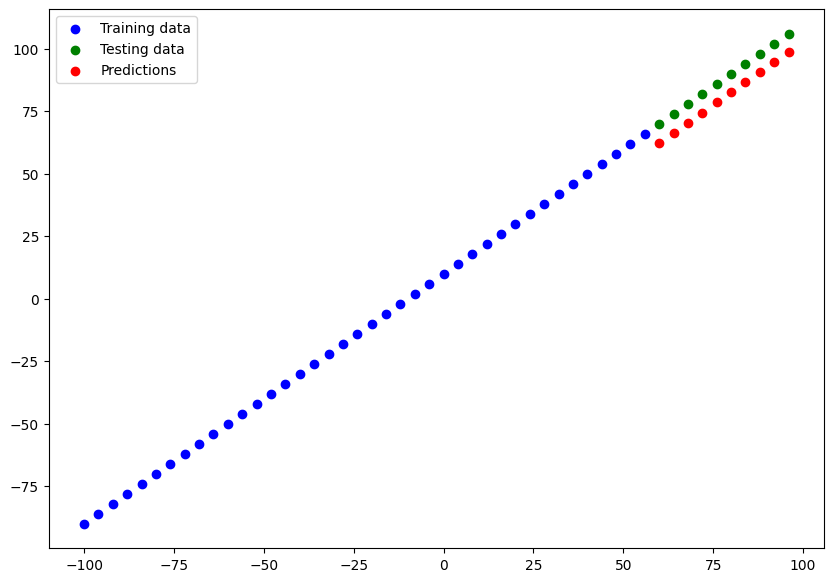

In [ ]:
# Make and plot predictions for model_1

y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions = y_pred)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(Y_test, y_preds_1)
mse_1 = mse(Y_test, y_preds_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.64866>,
 <tf.Tensor: shape=(), dtype=float32, numpy=81.31807>)

## Build Model 2

* 2 dense layers, trained for 100 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis = -1), Y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 66.2631 - mae: 66.2631
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 33.7559 - mae: 33.7559
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 37.2790 - mae: 37.2790
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 23.4306 - mae: 23.4306
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.0381 - mae: 14.0381
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.3229 - mae: 11.3229
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.4094 - mae: 12.4094
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0394 - mae: 11.0394
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 39.4382 - mae: 39.4382
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 26.9694 - mae: 26.9694
Epoch 11/100
2/2 [==============================] - 0s 8ms

1/1 [==============================] - 0s 62ms/step


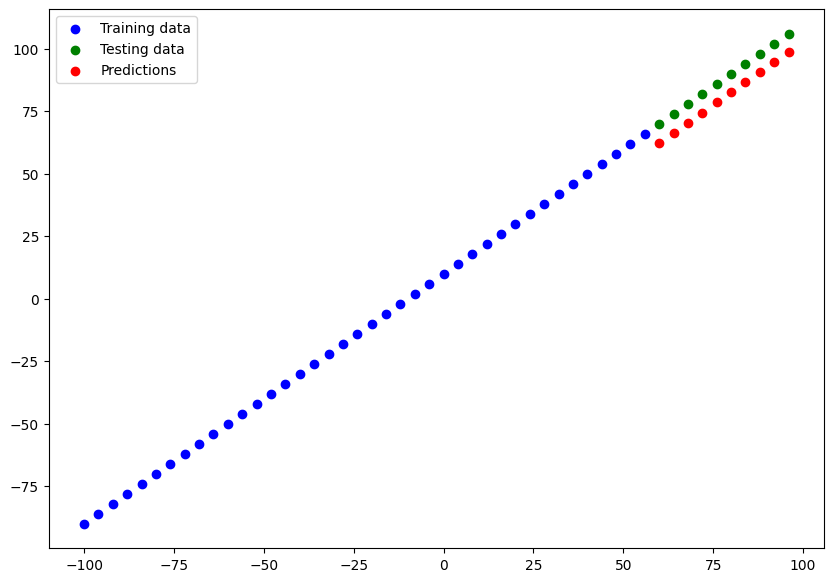

In [ ]:
# Make and plot predictions for model_1
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_pred)

In [ ]:
# Calculate model_1 evaluation metrics
mae_2 = mae(Y_test, y_preds_2)
mse_2 = mse(Y_test, y_preds_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=11.006093>,
 <tf.Tensor: shape=(), dtype=float32, numpy=129.17514>)

## Build model 3

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis = -1), Y_train, epochs = 500)


Epoch 1/500
2/2 [==============================] - 1s 13ms/step - loss: 37.5423 - mae: 37.5423
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 29.4555 - mae: 29.4555
Epoch 3/500
2/2 [==============================] - 0s 9ms/step - loss: 33.3854 - mae: 33.3854
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 13.5716 - mae: 13.5716
Epoch 5/500
2/2 [==============================] - 0s 12ms/step - loss: 18.4798 - mae: 18.4798
Epoch 6/500
2/2 [==============================] - 0s 13ms/step - loss: 9.3190 - mae: 9.3190
Epoch 7/500
2/2 [==============================] - 0s 12ms/step - loss: 10.3481 - mae: 10.3481
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 11.2794 - mae: 11.2794
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 42.5217 - mae: 42.5217
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 29.6516 - mae: 29.6516
Epoch 11/500
2/2 [==============================] - 0s 8m

1/1 [==============================] - 0s 87ms/step


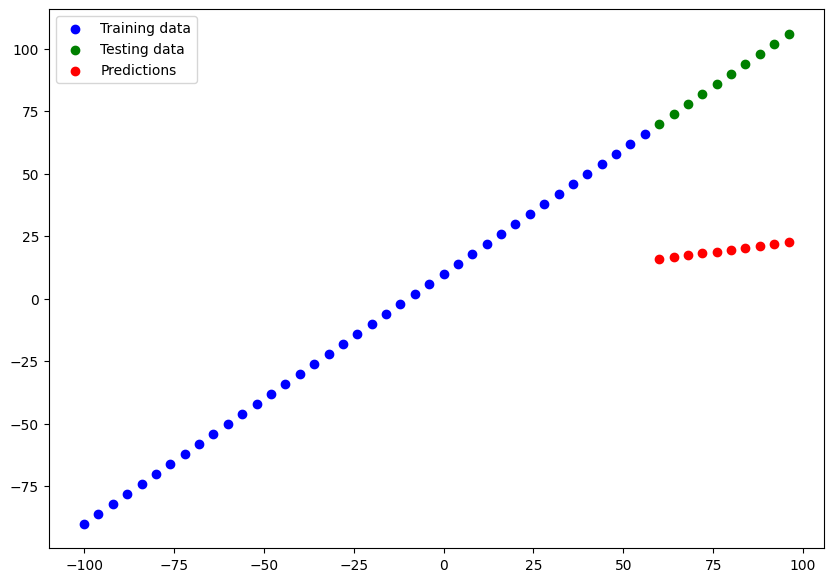

In [ ]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)

plot_predictions(predictions = y_preds_3)


# Looks like overfitting, resulting in bad predictions

In [ ]:
# Calculate model_1 evaluation metrics
mae_3 = mae(Y_test, y_preds_3)
mse_3 = mse(Y_test, y_preds_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.71584>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.362>)

## Comparing the results of our experiments


In [ ]:
# Compare results using Pandas
import pandas as pd

In [ ]:
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]


all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,8.648660,81.318069
1,model_2,11.006093,129.175140
2,model_3,68.715843,4808.361816


In [ ]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Note: One of the main goals should be to minimize the time between the experiments.

Resources:
* **Tensorboard** : a component of the TF library to help track modelling experiments

* **Weights & Biases**: a tool for tracking all kinds of ML experiments (plugs straight into Tensorboard)

# How to save a model

There are 2 formats we can save our modelss:

1. The SavedModel format

2. The HDF5 format

In [ ]:
# Save model using the SavedModel format
model_1.save("save_best_format")

In [ ]:
# Save model using HDF5 format
model_1.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading a Saved Model

In [ ]:
# load in the SavedModel format
loaded_Saved_Model_format = tf.keras.models.load_model("save_best_format")
loaded_Saved_Model_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# (Optional) How to Download Files from Google Colab

In [ ]:
# Download a file from Google Colab

from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

# A larger example: Medical Cost Personal Datasets

Data: https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset

# Note: import the raw dataset from GitHub
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


 For categorical variables, we have to create a numerical encoding (i.e. input features) before we can run DL model. Therefore, we will use "one-hot encoding".

In [ ]:
# Turns categorical into dummies (i.e. one-hot encoding to get all numerical)
insurance_one_hot = pd.get_dummies(insurance, dtype=int) # int is to turn True and False to binary
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
# Create X and Y values (features and labels)
X = insurance_one_hot.drop("charges", axis = 1)
Y = insurance_one_hot["charges"]

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View Y
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
# Build neural network model (2 layers)
# Linear Regression like
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

# 3. Fit model
insurance_model.fit(tf.expand_dims(X_train, axis = -1), Y_train, epochs = 100)


Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13259.3242 - mae: 13259.3242
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12342.7295 - mae: 12342.7295
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12176.6201 - mae: 12176.6201
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12103.3203 - mae: 12103.3203
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11992.0820 - mae: 11992.0820
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 11810.9180 - mae: 11810.9180
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 11495.6484 - mae: 11495.6484
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 10993.6699 - mae: 10993.6699
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 10380.2188 - mae: 10380.2188
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 9733.755

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8922.9551 - mae: 8922.9551


[8922.955078125, 8922.955078125]

In [ ]:
# Interpretation of the MAE
Y_train.median(), Y_train.mean()

# Looks like our model is not performing very good, so we need to improve

(9575.4421, 13346.089736364485)

Let's improve the model. We will run 3 experiments

2. Add an extra layers with more hidden units
3. Train for longer
4. Change optimizer (Adam instead of SGD)

> Add blockquote





Model 2: Add extra layer

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.SGD(),
                          metrics = ["mae"])

# 3. Fit the model
insurance_model_2.fit(tf.expand_dims(X_train, axis = -1), Y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 2s 4ms/step - loss: 12569.3281 - mae: 12569.3281
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 11732.7939 - mae: 11732.7939
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 11066.9854 - mae: 11066.9854
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 9999.3525 - mae: 9999.3525
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 10522.3252 - mae: 10522.3252
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 10603.2334 - mae: 10603.2334
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 9553.8984 - mae: 9553.8984
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 9456.7842 - mae: 9456.7842
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 10791.2812 - mae: 10791.2812
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 9171.2500 - ma

In [ ]:
# Evaluate the larger model i.e. insurance_model_2
insurance_model_2.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 3ms/step - loss: 9466.9482 - mae: 9466.9482


[9466.9482421875, 9466.9482421875]

Model 3: Train for longer

#

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.SGD(),
                          metrics = ["mae"])

# 3. Fit the model
insurance_model_3.fit(tf.expand_dims(X_train, axis = -1), Y_train, epochs = 500, verbose = 1)

Epoch 1/500
34/34 [==============================] - 1s 4ms/step - loss: 12533.7490 - mae: 12533.7490
Epoch 2/500
34/34 [==============================] - 0s 4ms/step - loss: 11874.1016 - mae: 11874.1006
Epoch 3/500
34/34 [==============================] - 0s 4ms/step - loss: 11180.7852 - mae: 11180.7852
Epoch 4/500
34/34 [==============================] - 0s 4ms/step - loss: 10865.7988 - mae: 10865.7988
Epoch 5/500
34/34 [==============================] - 0s 4ms/step - loss: 10384.3545 - mae: 10384.3545
Epoch 6/500
34/34 [==============================] - 0s 4ms/step - loss: 10284.3262 - mae: 10284.3262
Epoch 7/500
34/34 [==============================] - 0s 5ms/step - loss: 9678.2432 - mae: 9678.2432
Epoch 8/500
34/34 [==============================] - 0s 4ms/step - loss: 9821.9434 - mae: 9821.9434
Epoch 9/500
34/34 [==============================] - 0s 4ms/step - loss: 10632.7939 - mae: 10632.7939
Epoch 10/500
34/34 [==============================] - 0s 4ms/step - loss: 9837.7139 - 

In [ ]:
# Evaluate the larger model i.e. insurance_model_2
insurance_model_3.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 3ms/step - loss: 10185.1982 - mae: 10185.1982


[10185.1982421875, 10185.1982421875]

# Model 4: Change optimizer to Adam

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

# 3. Fit the model
history = insurance_model_4.fit(tf.expand_dims(X_train, axis = -1), Y_train, epochs = 500, verbose = 1)

Epoch 1/500
34/34 [==============================] - 1s 3ms/step - loss: 13337.1826 - mae: 13337.1826
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 13315.8154 - mae: 13315.8154
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 13276.5449 - mae: 13276.5449
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 13204.5439 - mae: 13204.5439
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 13083.7783 - mae: 13083.7783
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 12901.8877 - mae: 12901.8877
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 12665.4805 - mae: 12665.4805
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 12407.4326 - mae: 12407.4326
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 12198.9863 - mae: 12198.9863
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 12112.96

In [ ]:
# Evaluate the larger model i.e. insurance_model_4
insurance_model_4.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8631.5312 - mae: 8631.5312


[8631.53125, 8631.53125]

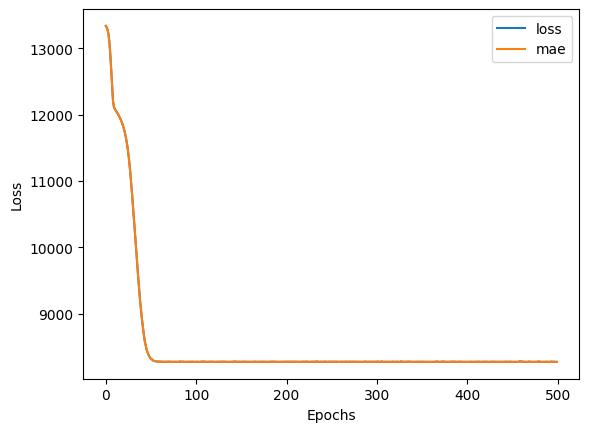

In [ ]:
# Plot history (i.e. loss curve/training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

## Preprocessing data (normalization and standardization)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Read in the insurance dataset

# Note: import the raw dataset from GitHub
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: ylabel='Frequency'>

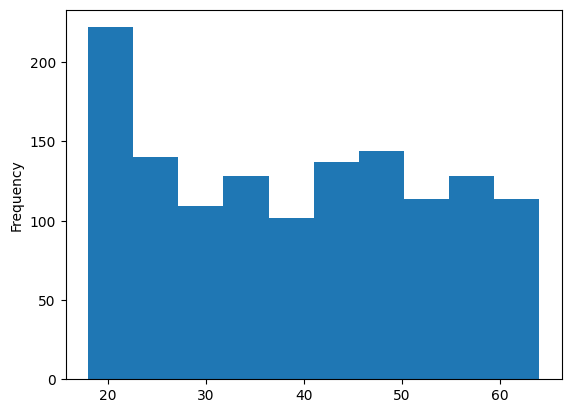

In [ ]:
insurance["age"].plot(kind = "hist")

<Axes: ylabel='Frequency'>

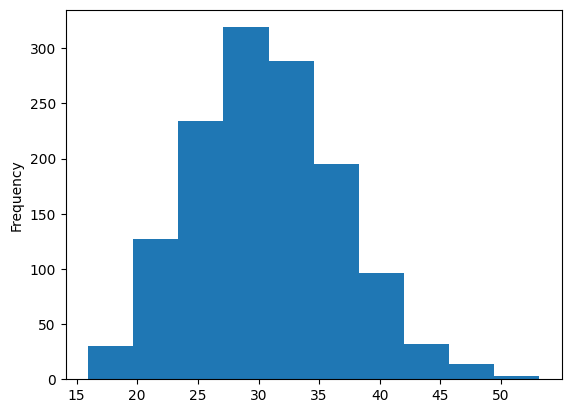

In [ ]:
insurance["bmi"].plot(kind = "hist")

Prepare our data for normalization

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])
 # OneHotEncode "sex", "smoker", and "region" into dummy variables. if there are columns that the OneHotEncoder does not know about, we ignore them. i.e.

)

# Create X & Y
X = insurance.drop("charges", axis = 1)
Y = insurance["charges"]

# Build our train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

Now, the data has been normalized and OneHotEncoded, so we can build NN model

In [ ]:
# Build a NN model to fit normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_5.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])


# 3. Fit the model
history_5 = insurance_model_5.fit(tf.expand_dims(X_train_normal, axis = -1), Y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 2s 5ms/step - loss: 13345.4414 - mae: 13345.4414
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13342.7744 - mae: 13342.7744
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13336.4482 - mae: 13336.4482
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13323.3643 - mae: 13323.3643
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13300.2959 - mae: 13300.2959
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 13264.1123 - mae: 13264.1123
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 13211.9717 - mae: 13211.9717
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 13141.1943 - mae: 13141.1943
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 13049.1162 - mae: 13049.1162
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 12933.21

In [ ]:
insurance_model_5.evaluate(X_test_normal, Y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8621.9688 - mae: 8621.9688


[8621.96875, 8621.96875]